In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

In [2]:
url = 'https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/loans_income.csv'
loans_income = pd.read_csv(url, squeeze=True)
loans_income

0         67000
1         52000
2        100000
3         78762
4         37041
          ...  
49995     40000
49996     54000
49997     50000
49998     82000
49999     70000
Name: x, Length: 50000, dtype: int64

In [3]:
sample_data = pd.DataFrame({
    'income': loans_income.sample(1000),
    'type': 'Data',
})

In [4]:
sample_mean_05 = pd.DataFrame({
    'income': [loans_income.sample(5).mean() for _ in range(1000)],
    'type': 'Mean of 5',
})

In [5]:
sample_mean_20 = pd.DataFrame({
    'income': [loans_income.sample(20).mean() for _ in range(1000)],
    'type': 'Mean of 20',
})

In [6]:
results = pd.concat([sample_data, sample_mean_05, sample_mean_20])
results

,income,type
18748,30000.00,Data
36074,55000.00,Data
23334,71164.00,Data
42380,35000.00,Data
48837,40000.00,Data
...,...,...
995,57688.20,Mean of 20
996,63044.95,Mean of 20
997,65181.90,Mean of 20
998,58612.90,Mean of 20


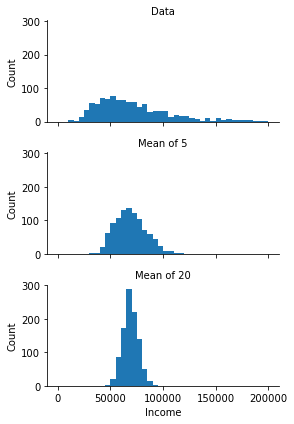

In [7]:
import seaborn as sns
g = sns.FacetGrid(results, col='type', col_wrap=1, height=2, aspect=2)
g.map(plt.hist, 'income', range=[0, 200000], bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}');

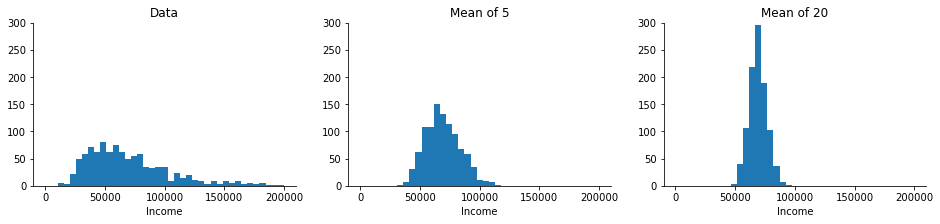

In [21]:
fig, axes = plt.subplots(1,3, figsize=(16,3))
axes[0].hist(results[results.type=='Data'].income, bins=np.linspace(0, 200000, 40))
axes[1].hist(results[results.type=='Mean of 5'].income, bins=np.linspace(0, 200000, 40))
axes[2].hist(results[results.type=='Mean of 20'].income, bins=np.linspace(0, 200000, 40))
axes[0].set_ylim(0,300)
axes[1].set_ylim(0,300)
axes[2].set_ylim(0,300)
axes[0].set_title('Data')
axes[1].set_title('Mean of 5')
axes[2].set_title('Mean of 20')
axes[0].set_xlabel('Income')
axes[1].set_xlabel('Income')
axes[2].set_xlabel('Income')
axes[0].spines['right'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[2].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)
axes[1].spines['top'].set_visible(False)
axes[2].spines['top'].set_visible(False);